In [1]:
!nvidia-smi

Sat Jul  2 21:14:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch 

if torch.cuda.is_available():
    device = torch.device('cuda')
    
    print('there are %d GPU(s) available.' % torch.cuda.device_count())
    
    print('we will use the GPU: ', torch.cuda.get_device_name(0))
    
else:
    print("No GPU available, using the GPU instead")
    device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [3]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -q -U watermark

In [5]:
!pip install -qq transformers

In [6]:
!pip install transformers==3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import re
import os
from time import time

import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import tensorflow as tf
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

import imblearn as imb
import imblearn.under_sampling
import imblearn.over_sampling
import imblearn.ensemble

In [8]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 3.0.0



In [9]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [10]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pandas as pd
import re
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
import json
from bs4 import BeautifulSoup
import unicodedata
from csv import writer
import nltk
import numpy as np
from nltk.corpus import wordnet
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

nltk.download('stopwords') 
nltk.download('punkt')
set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [11]:
from sklearn import metrics

In [12]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import tqdm
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

##Import data

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import pandas as pd
dat=pd.read_csv("gdrive/My Drive/Colab Notebooks/aspeksistem.csv")
print(dat)

            Date                                               Data  score  \
0     2020-09-16  Wattpad skrng enggak kayak wattpad dulu. Saya ...      1   
1     2020-09-16  Maaf ka.sebelumnya, klo menurut saya bagus yg ...      2   
2     2020-09-16  Udh lama make ini, rasanya udh nyaman tpi pas ...      1   
3     2020-09-16  Tolong wattpad kembalikan ke versi dulu ya. So...      1   
4     2020-09-16  Halo wattpad ku pengguna dari zaman SMK 2015-a...      1   
...          ...                                                ...    ...   
2488  2021-03-06  Bagus bgt apk nya gw udh pake dri 2016, tpi yg...      4   
2489  2021-03-07  Bagus bgt sih aku suka, tapi knapa offline nya...      5   
2490  2021-03-10  Bagus bgt kita bisa download ceritanya dan bac...      5   
2491  2021-03-11  Watpadd akhir2 ini sering eror. Tiba2 macet da...      3   
2492  2021-03-12  Skrg g kek dulu, abis di update kok mlh harus ...      3   

                                           Data_Cleaned  
0    

In [16]:
dat.to_csv('dat.csv')
dat.head()

,Date,Data,score,Data_Cleaned
0,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...
1,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...
2,2020-09-16,"Udh lama make ini, rasanya udh nyaman tpi pas ...",1,lama enak perbarui premium unduh ubah boros ku...
3,2020-09-16,Tolong wattpad kembalikan ke versi dulu ya. So...,1,versi batas cerita luar jaringan efektif bayar...
4,2020-09-16,Halo wattpad ku pengguna dari zaman SMK 2015-a...,1,zaman penulis cerita luar jaringan iklan bandi...


In [17]:
dat.shape

(2493, 4)

In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          2493 non-null   object
 1   Data          2493 non-null   object
 2   score         2493 non-null   int64 
 3   Data_Cleaned  2493 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.0+ KB


In [19]:
def to_rating(score):
  rating = int(score)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

dat['rating'] = dat.score.apply(to_rating)

In [20]:
dat.head()

,Date,Data,score,Data_Cleaned,rating
0,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...,0
1,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...,0
2,2020-09-16,"Udh lama make ini, rasanya udh nyaman tpi pas ...",1,lama enak perbarui premium unduh ubah boros ku...,0
3,2020-09-16,Tolong wattpad kembalikan ke versi dulu ya. So...,1,versi batas cerita luar jaringan efektif bayar...,0
4,2020-09-16,Halo wattpad ku pengguna dari zaman SMK 2015-a...,1,zaman penulis cerita luar jaringan iklan bandi...,0


In [21]:
class_names1 = ['negative', 'netral', 'positive']

In [22]:
# tiap sentimen ada berapa ulasan
dat.rating.value_counts()

0    1504
2     606
1     383
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


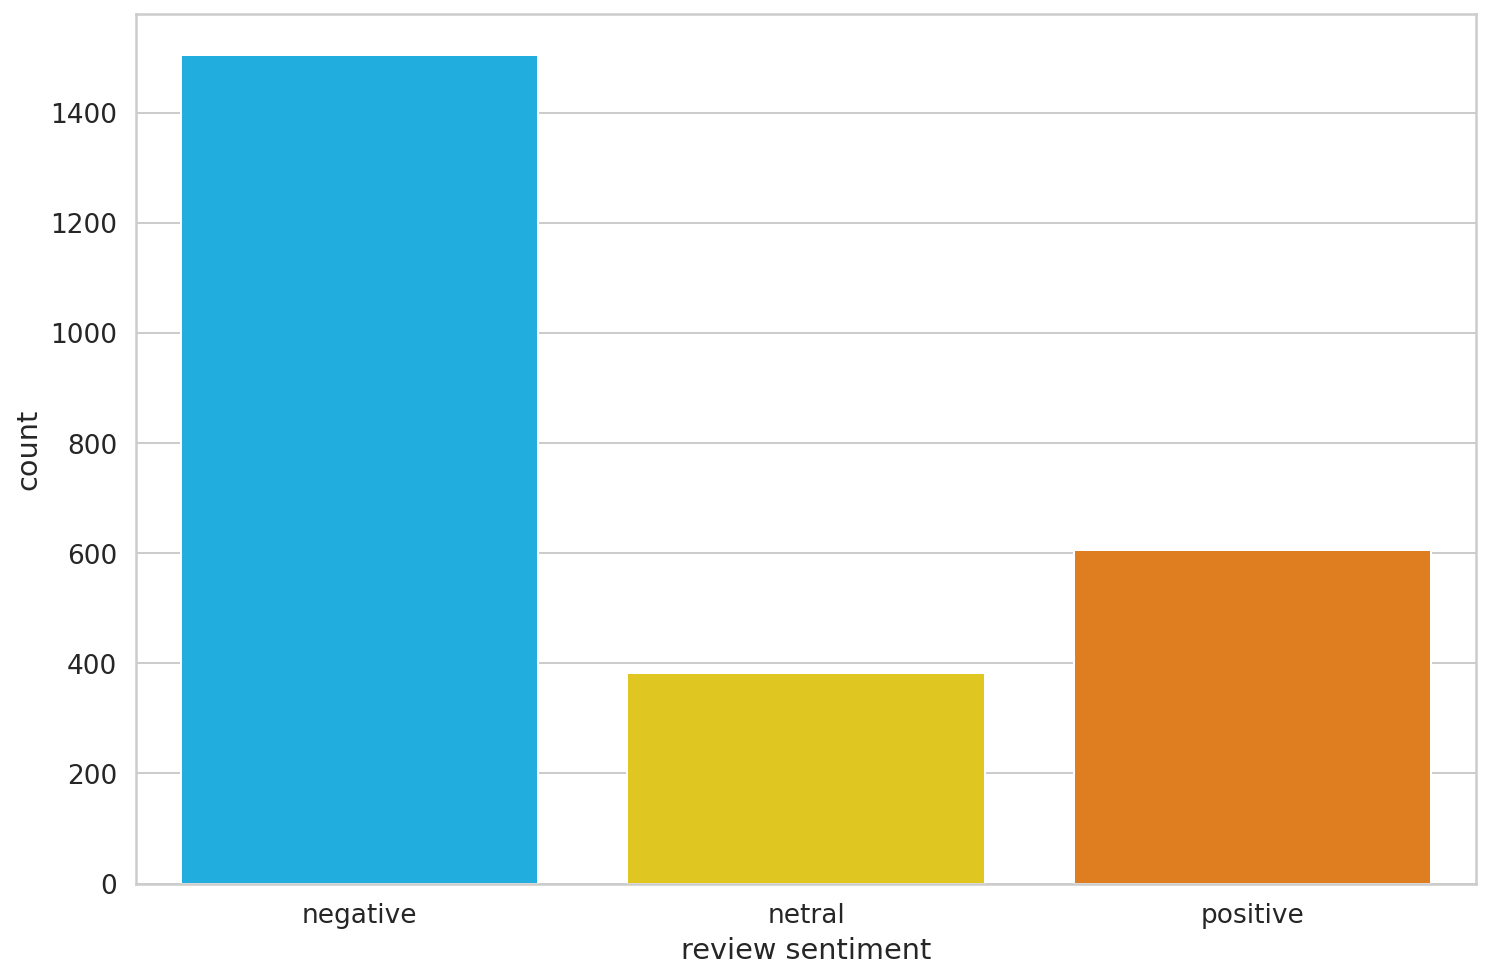

In [23]:
ax = sns.countplot(dat.rating)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names1);

In [24]:
from transformers import BertTokenizer 

print ("Loading Bert Tokenizer")
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

Loading Bert Tokenizer


In [25]:
tokenizer.vocab_size

30521

In [26]:
tokenizer.ids_to_tokens

OrderedDict([(0, '[PAD]'),
             (1, '[UNK]'),
             (2, '[CLS]'),
             (3, '[SEP]'),
             (4, '[MASK]'),
             (5, '##an'),
             (6, 'd'),
             (7, '##er'),
             (8, 'm'),
             (9, '##en'),
             (10, 's'),
             (11, 'p'),
             (12, '##ar'),
             (13, 'b'),
             (14, 'k'),
             (15, '##at'),
             (16, '##ang'),
             (17, '##in'),
             (18, 't'),
             (19, '##ak'),
             (20, '##al'),
             (21, '##ah'),
             (22, '##as'),
             (23, '##un'),
             (24, '##am'),
             (25, '##em'),
             (26, 'di'),
             (27, '##ya'),
             (28, '##el'),
             (29, '##ad'),
             (30, '##eng'),
             (31, 'y'),
             (32, '##kan'),
             (33, '##tu'),
             (34, 'yang'),
             (35, 'se'),
             (36, '##ap'),
             (37, '##is'),
   

In [27]:
sentences = dat.Data_Cleaned.values
labels = dat.rating.values

In [28]:
tokens = tokenizer.tokenize(sentences[0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sentences[0]}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: sekarang kecewa baca luar jaringan cerita sisa dalam jaringan iklan slide cerita seru bayar keluar uang kouta tempat beli koin baca baca enak
   Tokens: ['sekarang', 'kecewa', 'baca', 'luar', 'jaringan', 'cerita', 'sisa', 'dalam', 'jaringan', 'iklan', 'slide', 'cerita', 'seru', 'bayar', 'keluar', 'uang', 'ko', '##uta', 'tempat', 'beli', 'koin', 'baca', 'baca', 'enak']
Token IDs: [747, 6743, 2064, 892, 1799, 1634, 5075, 112, 1799, 1505, 15009, 1634, 5159, 5759, 654, 988, 1455, 1257, 515, 1320, 13040, 2064, 2064, 3107]


In [29]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 3)

In [30]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 2)

In [31]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [32]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 1)

In [33]:
encoding = tokenizer.encode_plus(
  sentences[0],
  max_length=64,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation=True,
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [34]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

64


tensor([    2,   747,  6743,  2064,   892,  1799,  1634,  5075,   112,  1799,
         1505, 15009,  1634,  5159,  5759,   654,   988,  1455,  1257,   515,
         1320, 13040,  2064,  2064,  3107,     3,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])

In [35]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

64


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [36]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'sekarang',
 'kecewa',
 'baca',
 'luar',
 'jaringan',
 'cerita',
 'sisa',
 'dalam',
 'jaringan',
 'iklan',
 'slide',
 'cerita',
 'seru',
 'bayar',
 'keluar',
 'uang',
 'ko',
 '##uta',
 'tempat',
 'beli',
 'koin',
 'baca',
 'baca',
 'enak',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [37]:
import logging
logging.basicConfig(level=logging.ERROR)

In [38]:
token_lens = []

for txt in dat.Data_Cleaned:
  tokens = tokenizer.encode(txt, max_length=75)
  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


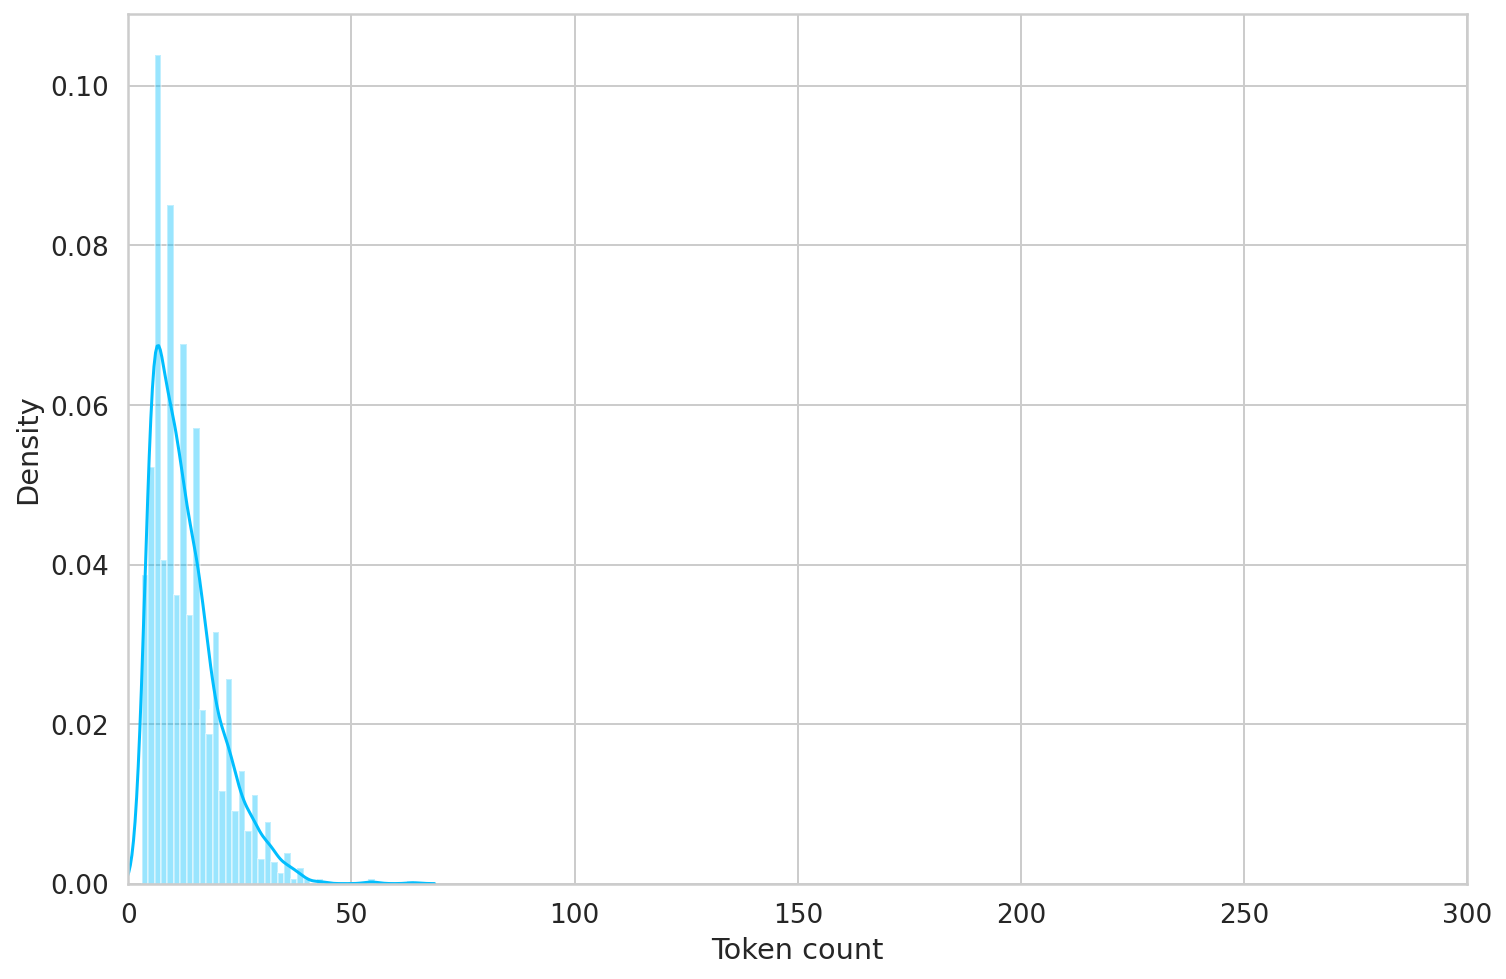

In [39]:
sns.distplot(token_lens)
plt.xlim([0, 300]);
plt.xlabel('Token count');

In [40]:
MAX_LEN = 64

In [41]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dat,dat['rating'], test_size=1/3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.8, random_state=42)

In [43]:
X_train.shape, X_val.shape, X_test.shape

((1662, 5), (166, 5), (665, 5))

In [44]:
X_train

,Date,Data,score,Data_Cleaned,rating
792,2020-10-25,"Udh ada mode online jadi aku krg suka ,tapi gp...",5,mode dalam jaringan krg suka suka penulis,2
831,2020-10-26,"Mon maap ni ya, cuma pengen komplen.. ni wattp...",1,versi perbarui enak memuat bagian lama jaring ...,0
162,2020-09-26,"saya kecewa sama wattpad kalo udah di update ,...",2,kecewa perbarui tarik bagus nyata baca luar ja...,0
1302,2020-11-30,INI KENAPA DAH TERGANTUNG SAMA PREMIUM SIH? Iy...,1,gantung premium harga karya longgar anak sekol...,0
526,2020-10-17,Kirain update terbaru wp ngembaliin fitur baca...,1,kirain perbarui ngembaliin fitur baca luar jar...,0
...,...,...,...,...,...
1638,2021-01-06,Sebenernya sih bagus ya aplikasi nya cuma agak...,4,bagus luar jaringan cerita dipake luar jaringa...,2
1095,2020-11-13,Beda sama versi yang lama.... Sangat mengecewakan,3,beda versi lama kecewa,1
1130,2020-11-16,"Kecewa sih, wattpad udah gak kayak dulu. Dulu ...",1,kecewa cerita luar jaringan developer balikin ...,0
1294,2020-11-30,Ugh bagus banget dulu pas belum aku apdate cer...,5,bagus apdate cerita luar jaringan sekarang,2


##BERT

In [45]:
def create_data_loader(dat, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews = dat.Data_Cleaned.to_numpy(),
    targets = dat.rating.to_numpy(),
    tokenizer = tokenizer,
    max_len = max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [46]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(X_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [47]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}

In [48]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [49]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32])


In [50]:
from transformers import BertTokenizer, AutoModel

PRE_TRAINED_MODEL_NAME = "indobenchmark/indobert-base-p1"
bert_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [51]:
last_hidden_state.shape

torch.Size([1, 64, 768])

In [52]:
bert_model.config.hidden_size

768

In [53]:
pooled_output.shape

torch.Size([1, 768])

In [54]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [55]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from itertools import cycle

In [57]:
model = SentimentClassifier(len(class_names1))
model = model.to(device)

In [58]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 64])
torch.Size([32, 64])


In [59]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3334, 0.4234, 0.2432],
        [0.4493, 0.1950, 0.3557],
        [0.3581, 0.3734, 0.2685],
        [0.2275, 0.4192, 0.3532],
        [0.3842, 0.3563, 0.2595],
        [0.4527, 0.2862, 0.2612],
        [0.3825, 0.3192, 0.2983],
        [0.3881, 0.3089, 0.3030],
        [0.4465, 0.2898, 0.2637],
        [0.3801, 0.3394, 0.2805],
        [0.4173, 0.2794, 0.3032],
        [0.3357, 0.4038, 0.2605],
        [0.4013, 0.2964, 0.3023],
        [0.4458, 0.3254, 0.2288],
        [0.3510, 0.3239, 0.3251],
        [0.4053, 0.2969, 0.2978],
        [0.3497, 0.3537, 0.2966],
        [0.3899, 0.3061, 0.3041],
        [0.4046, 0.3103, 0.2851],
        [0.3081, 0.3402, 0.3517],
        [0.4419, 0.3279, 0.2302],
        [0.4580, 0.2654, 0.2767],
        [0.3703, 0.3618, 0.2678],
        [0.4946, 0.3295, 0.1759],
        [0.4040, 0.3075, 0.2885],
        [0.4615, 0.2361, 0.3024],
        [0.4358, 0.2977, 0.2666],
        [0.4140, 0.2988, 0.2872],
        [0.3948, 0.2921, 0.3131],
        [0.453

In [60]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [61]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [62]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [63]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [64]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.9689597407212625 accuracy 0.5824308062575211
Val   loss 0.9239248832066854 accuracy 0.6265060240963856

Epoch 2/4
----------
Train loss 0.896192864729808 accuracy 0.6143200962695547
Val   loss 0.8933829466501871 accuracy 0.6987951807228916

Epoch 3/4
----------
Train loss 0.8122571890170758 accuracy 0.6787003610108303
Val   loss 0.8646367887655894 accuracy 0.6867469879518072

Epoch 4/4
----------
Train loss 0.729825666317573 accuracy 0.7160048134777377
Val   loss 0.8830781479676565 accuracy 0.710843373493976

CPU times: user 52.7 s, sys: 25.1 s, total: 1min 17s
Wall time: 1min 24s


In [65]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.710843373493976

In [66]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6390977443609023

In [67]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [68]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [69]:
print(classification_report(y_test, y_pred, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.67      0.88      0.76       410
      netral       0.00      0.00      0.00        95
    positive       0.50      0.39      0.44       160

    accuracy                           0.64       665
   macro avg       0.39      0.43      0.40       665
weighted avg       0.53      0.64      0.58       665



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


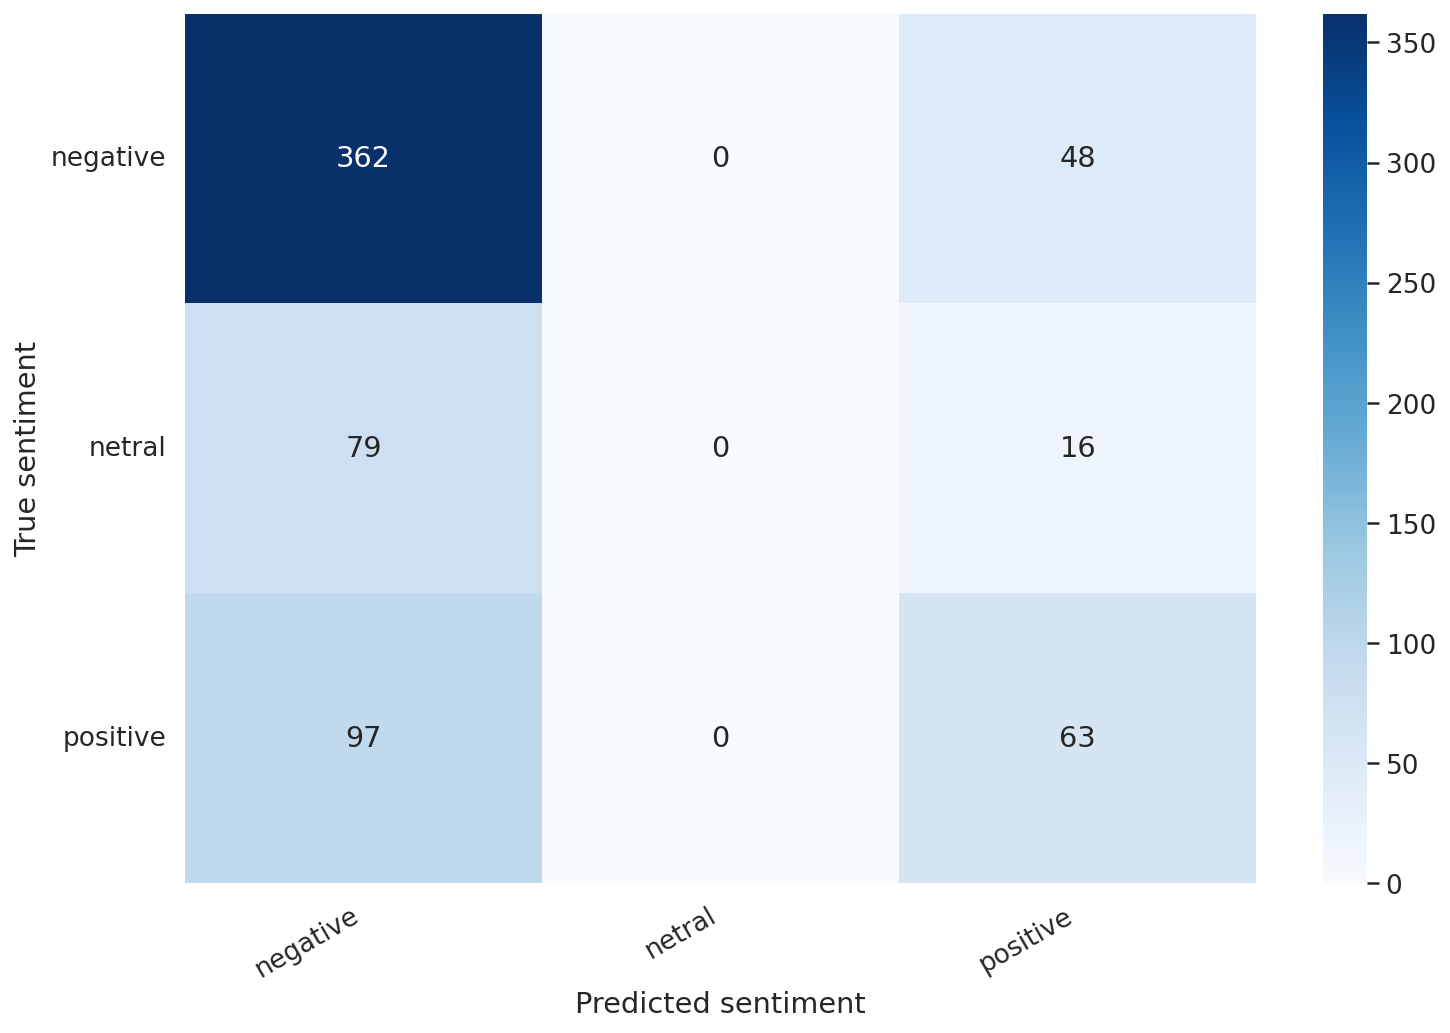

In [70]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

In [71]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix , classification_report , roc_curve, auc, roc_auc_score

ROC AUC score: 0.783449601447227


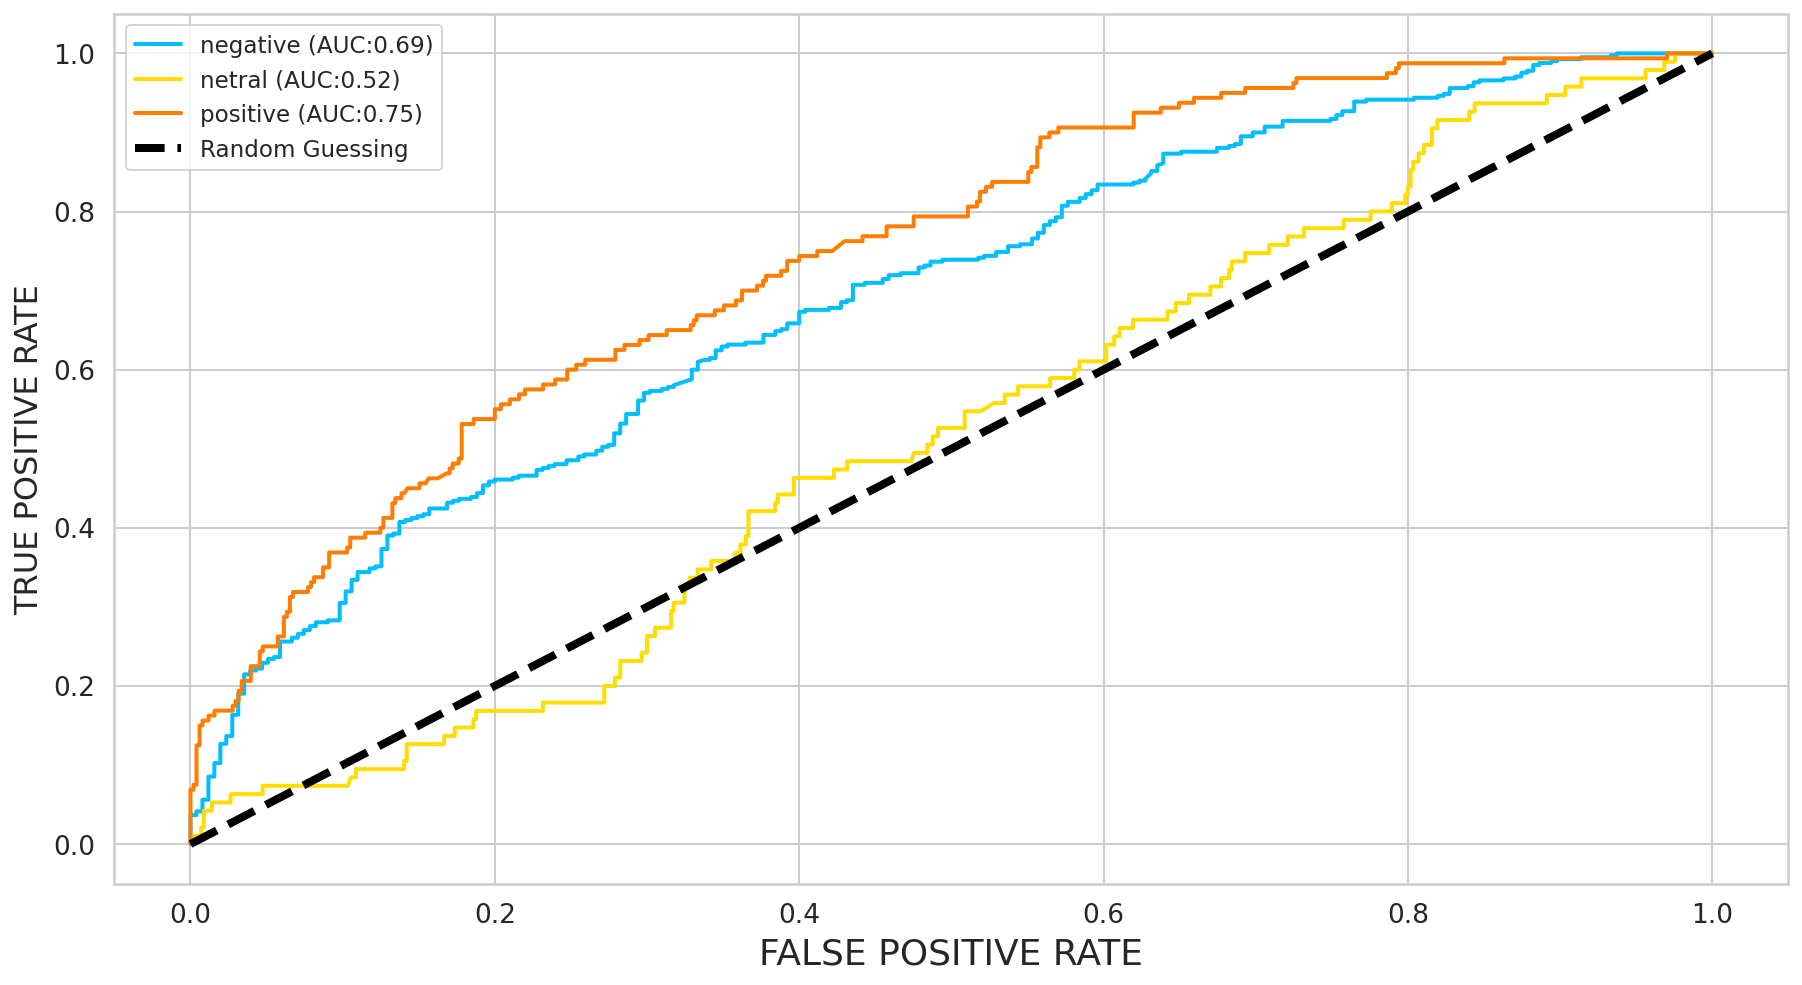

In [72]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

In [73]:
idx = 7

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [74]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

versi batu keren luar jaringan baru

True sentiment: positive


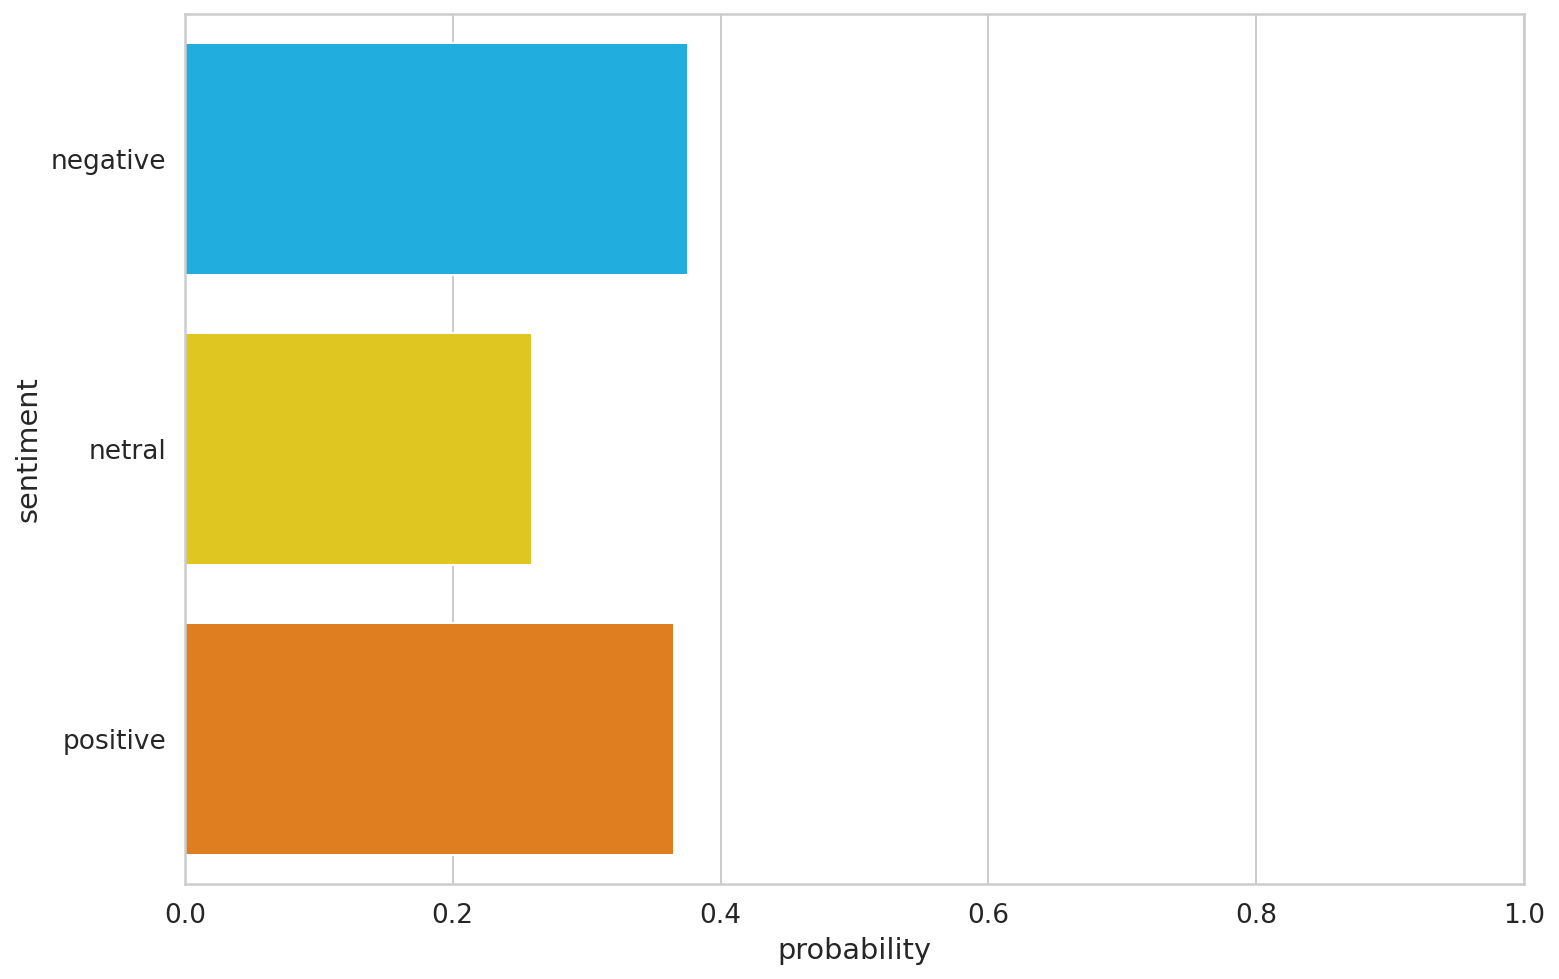

In [75]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [76]:
review_text = "HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶"

In [77]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [78]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names1[prediction]}')

Review text: HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶
Sentiment  : negative


In [79]:
idx = 18

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [80]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

suka baca bayar sedih baca luar jaringan simpan dalam jaringan

True sentiment: negative


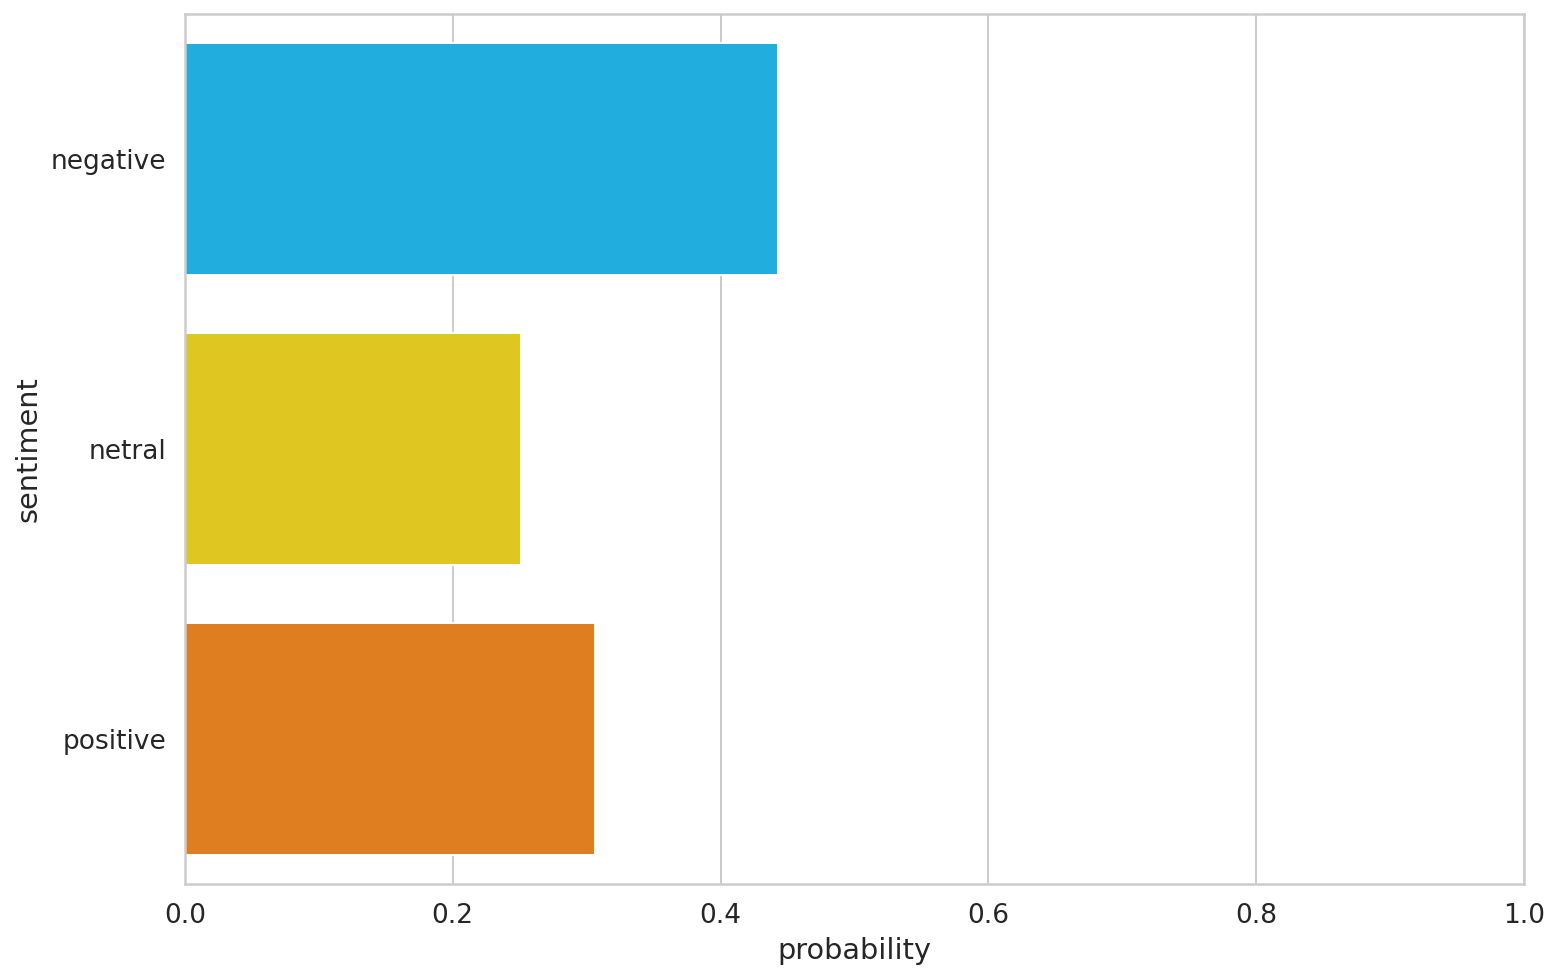

In [81]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [82]:
idx = 12

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [83]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

baca cerita luar jaringan konsep

True sentiment: negative


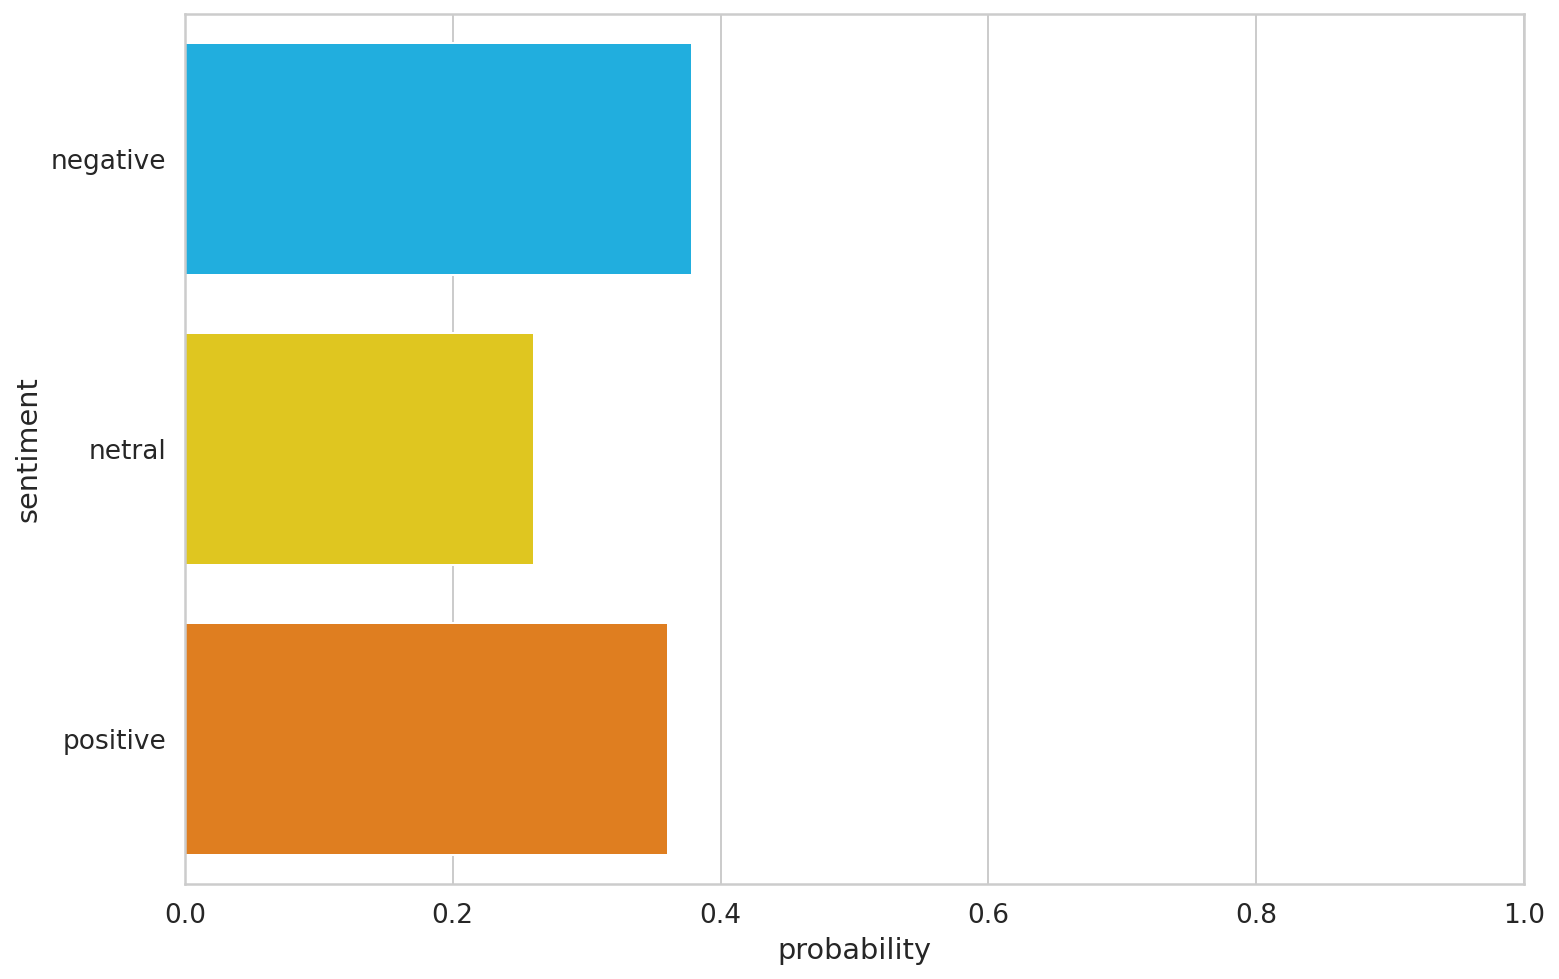

In [84]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [85]:
review_text = "HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶"

In [86]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [87]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names1[prediction]}')

Review text: HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶
Sentiment  : negative


## 2e-5

In [88]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [89]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [90]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [91]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [92]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.8882096455647395 accuracy 0.6299638989169676
Val   loss 0.909984697898229 accuracy 0.6024096385542169

Epoch 2/4
----------
Train loss 0.8390797147384057 accuracy 0.6618531889290012
Val   loss 0.9772421717643738 accuracy 0.6626506024096386

Epoch 3/4
----------
Train loss 0.6844912383418816 accuracy 0.7388688327316486
Val   loss 1.015796422958374 accuracy 0.6325301204819277

Epoch 4/4
----------
Train loss 0.5571888112104856 accuracy 0.779783393501805
Val   loss 1.106042315562566 accuracy 0.6385542168674699

CPU times: user 53.2 s, sys: 26.2 s, total: 1min 19s
Wall time: 1min 22s


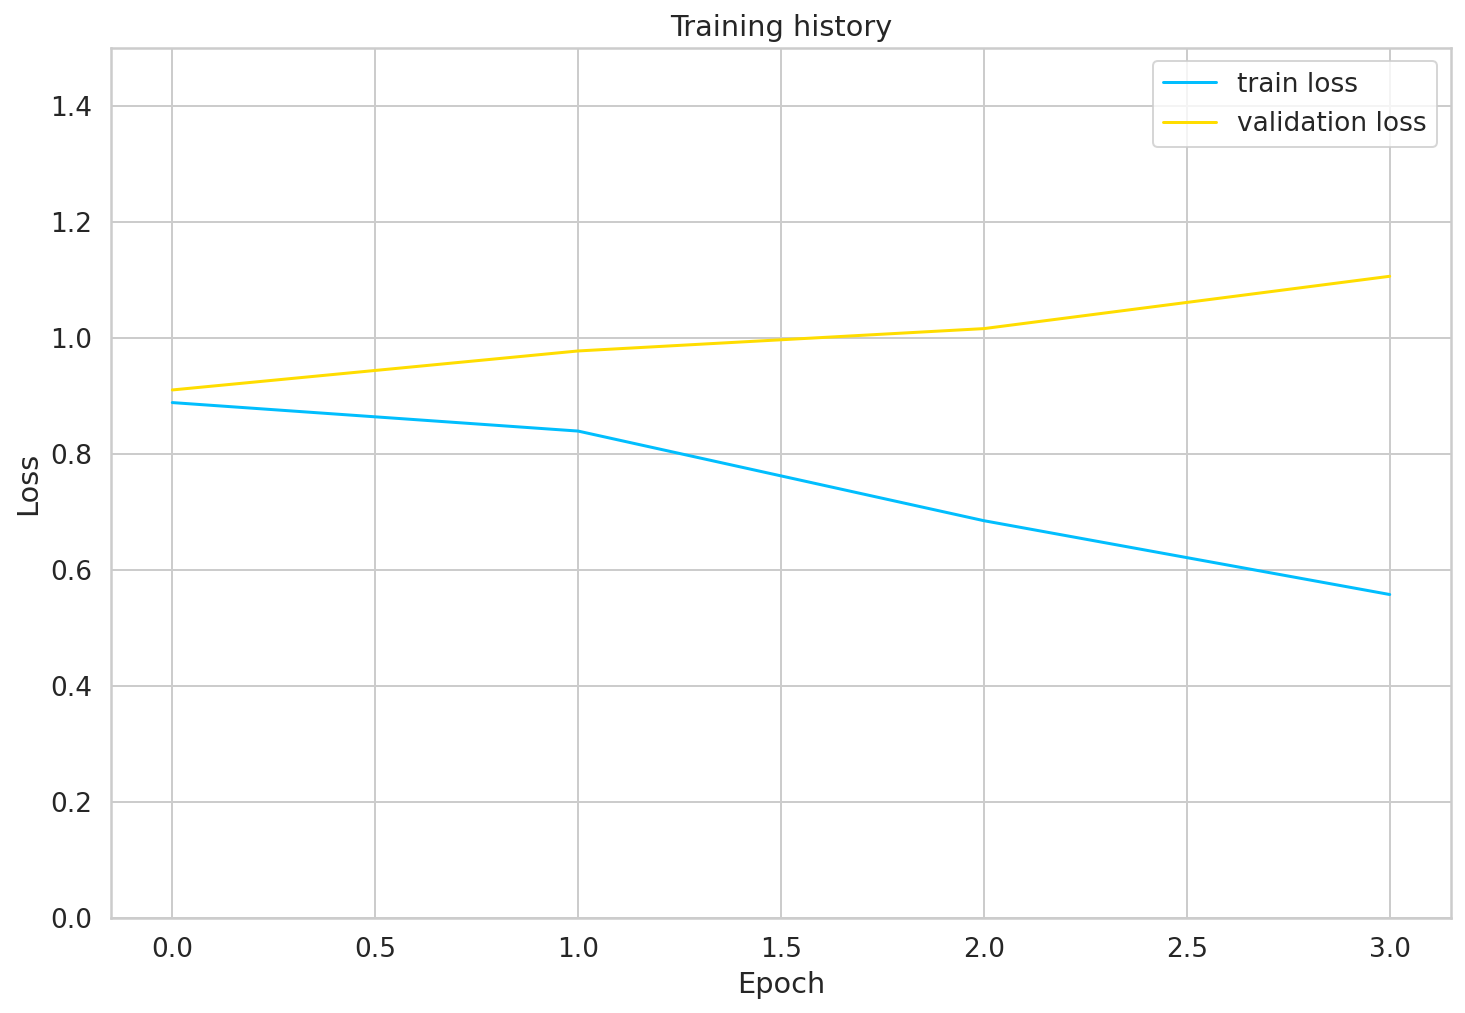

In [93]:
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1.5]);

In [94]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6385542168674699

In [95]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6105263157894737

In [96]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [97]:
y_review_texts, y_pred2, y_pred_probs2, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [98]:
print(classification_report(y_test, y_pred2, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.69      0.83      0.75       410
      netral       0.10      0.06      0.08        95
    positive       0.56      0.38      0.45       160

    accuracy                           0.61       665
   macro avg       0.45      0.42      0.43       665
weighted avg       0.57      0.61      0.58       665



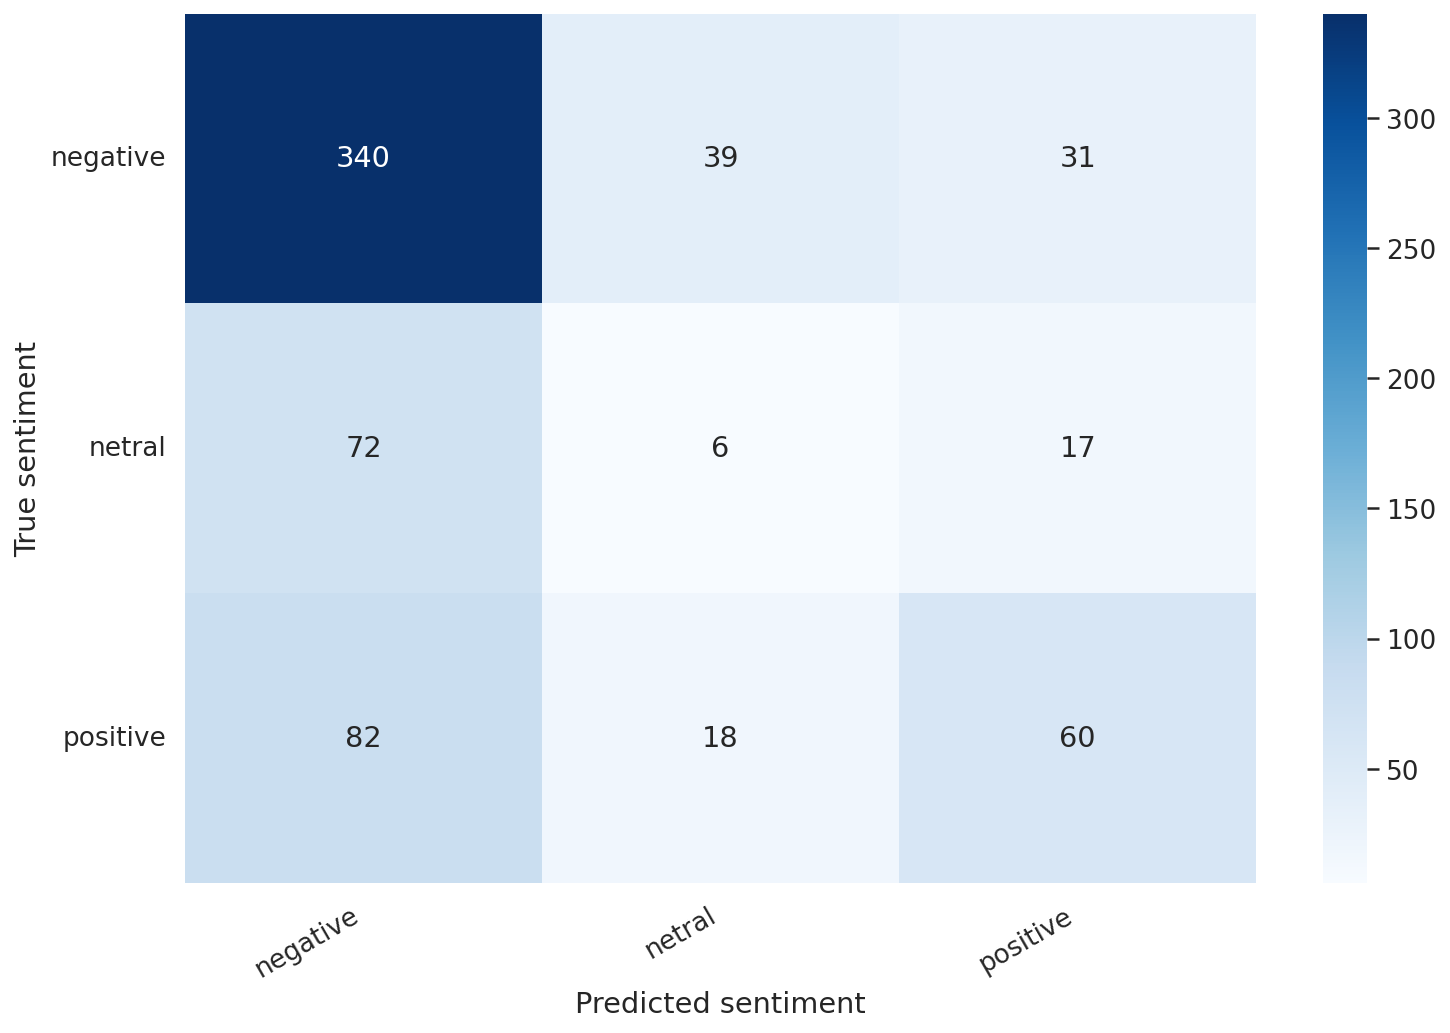

In [99]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred2)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.7677505794561592


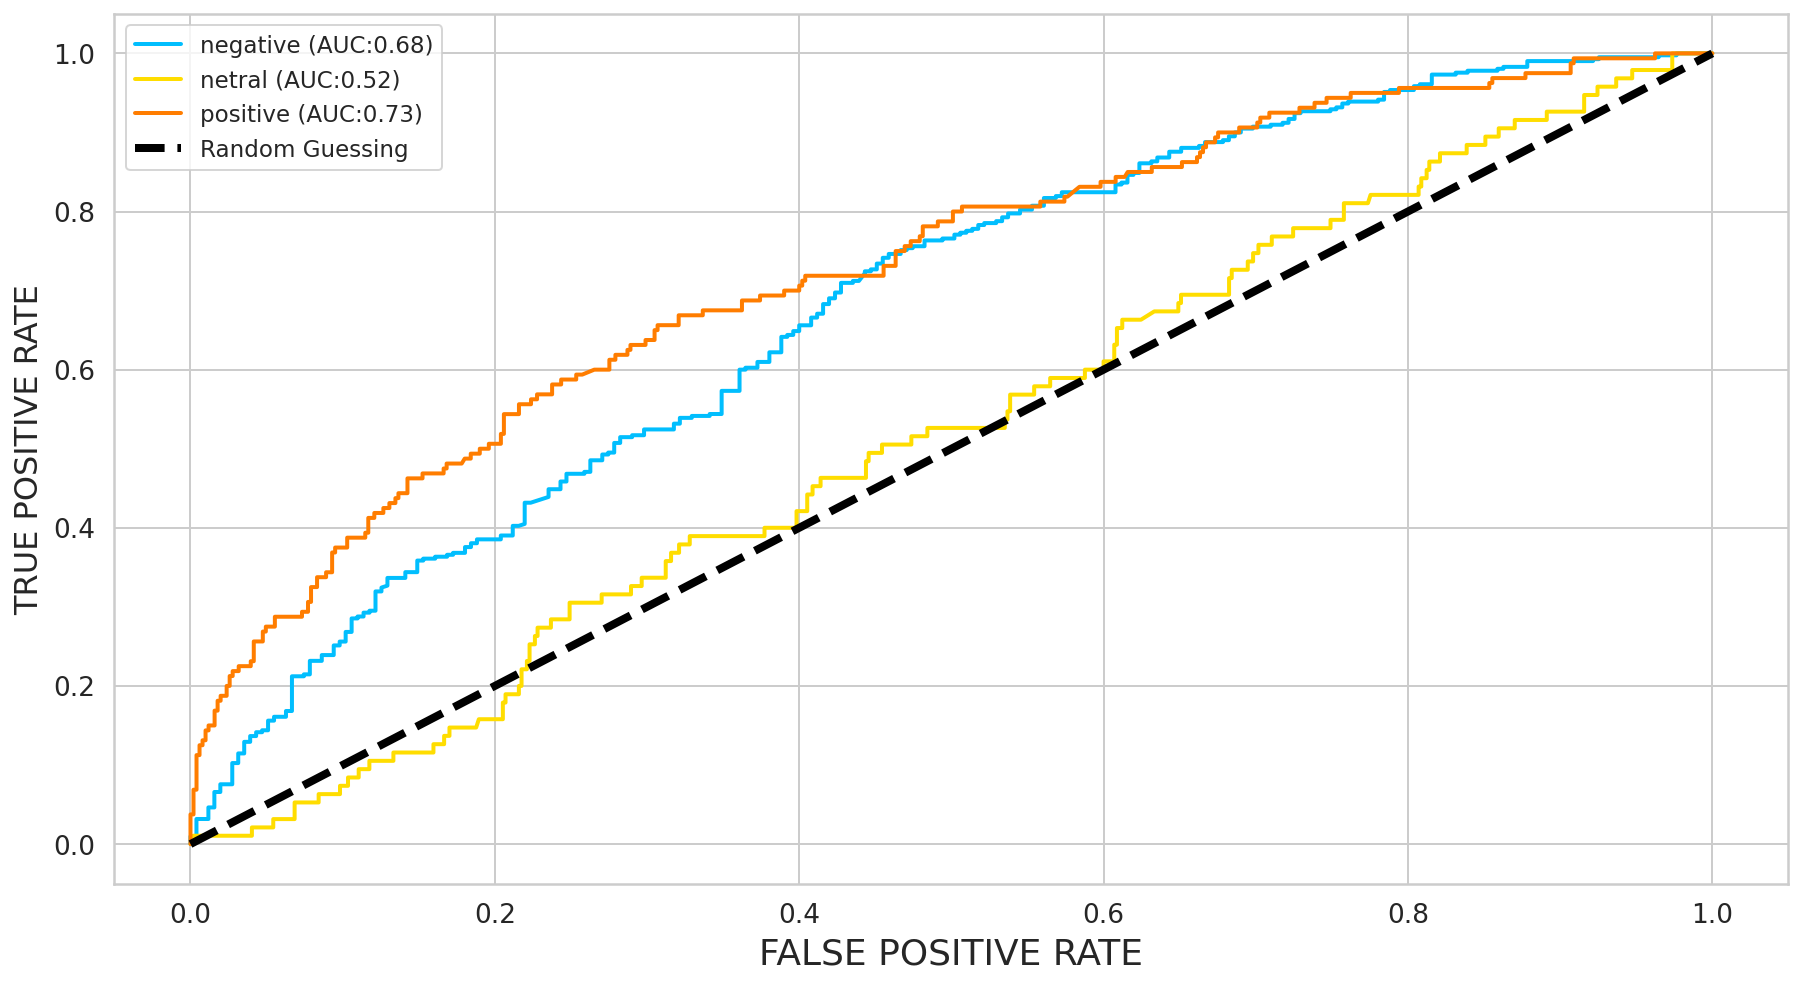

In [100]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs2 , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

##3e-5

In [101]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=3e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [102]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [103]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [104]:
import gc
gc.collect()
torch.cuda.empty_cache()


In [105]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.8861549479457048 accuracy 0.6365824308062575
Val   loss 1.0056254367033641 accuracy 0.6265060240963856

Epoch 2/4
----------
Train loss 0.9464806685080895 accuracy 0.5836341756919374
Val   loss 0.9694432318210602 accuracy 0.6265060240963856

Epoch 3/4
----------
Train loss 0.9146658239456323 accuracy 0.5926594464500602
Val   loss 0.8992304901281992 accuracy 0.6445783132530121

Epoch 4/4
----------
Train loss 0.8657202158982937 accuracy 0.644404332129964
Val   loss 0.93319105108579 accuracy 0.6686746987951807

CPU times: user 53.3 s, sys: 26.3 s, total: 1min 19s
Wall time: 1min 24s


In [106]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6686746987951807

In [107]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6421052631578947

In [108]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [109]:
y_review_texts, y_pred3, y_pred_probs3, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [110]:
print(classification_report(y_test, y_pred3, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.66      0.94      0.77       410
      netral       0.00      0.00      0.00        95
    positive       0.53      0.26      0.35       160

    accuracy                           0.64       665
   macro avg       0.40      0.40      0.37       665
weighted avg       0.53      0.64      0.56       665



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


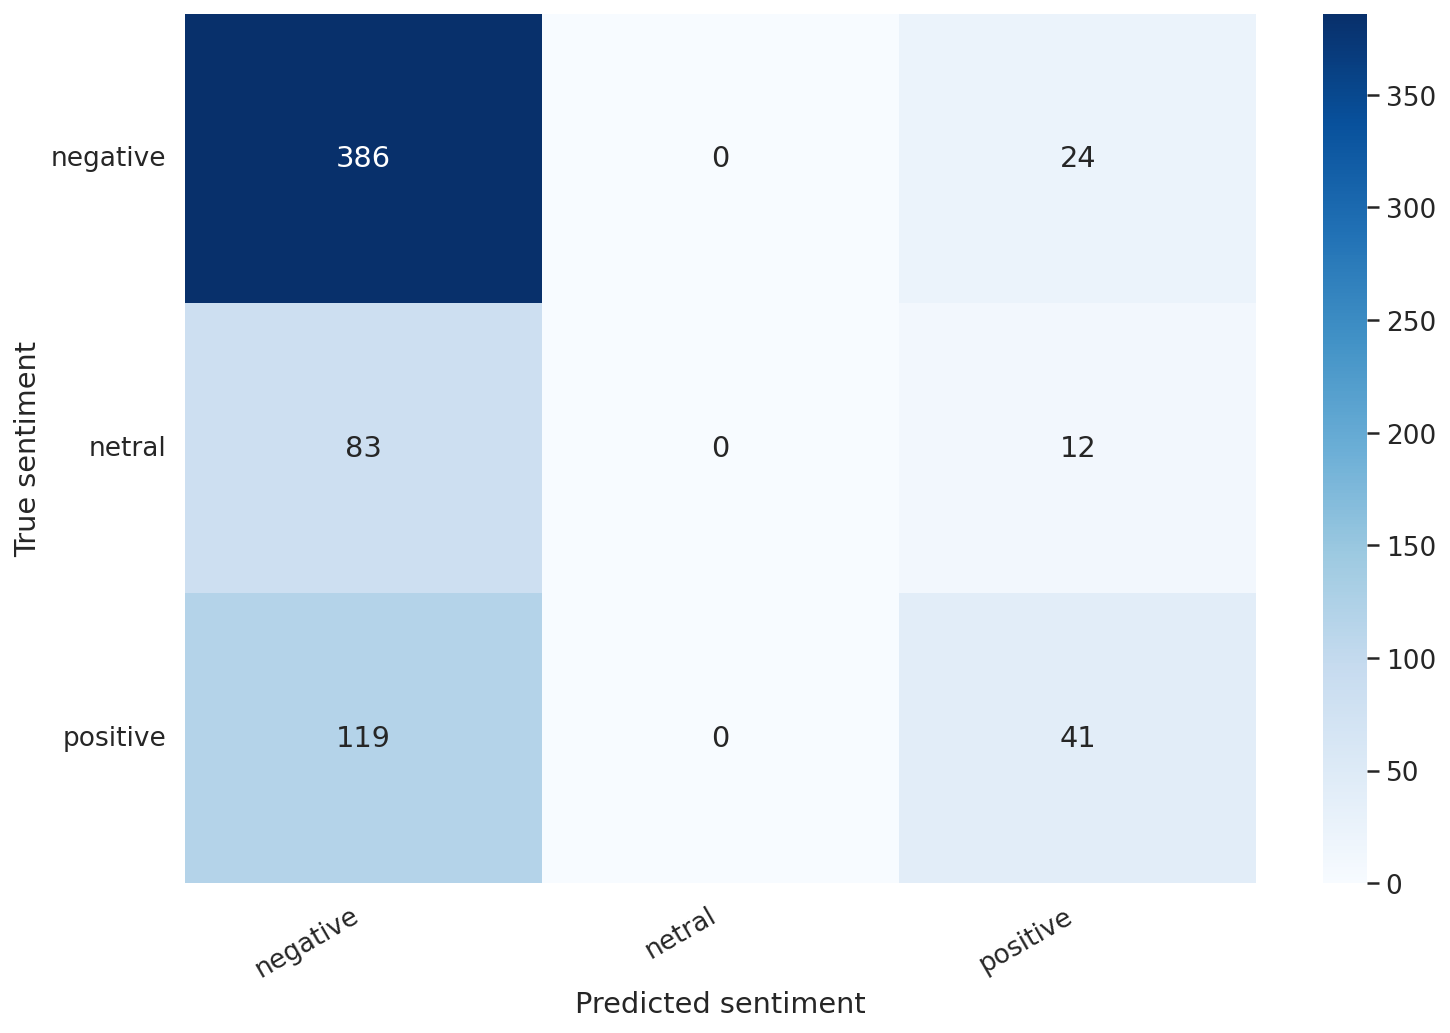

In [111]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred3)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.763377240092713


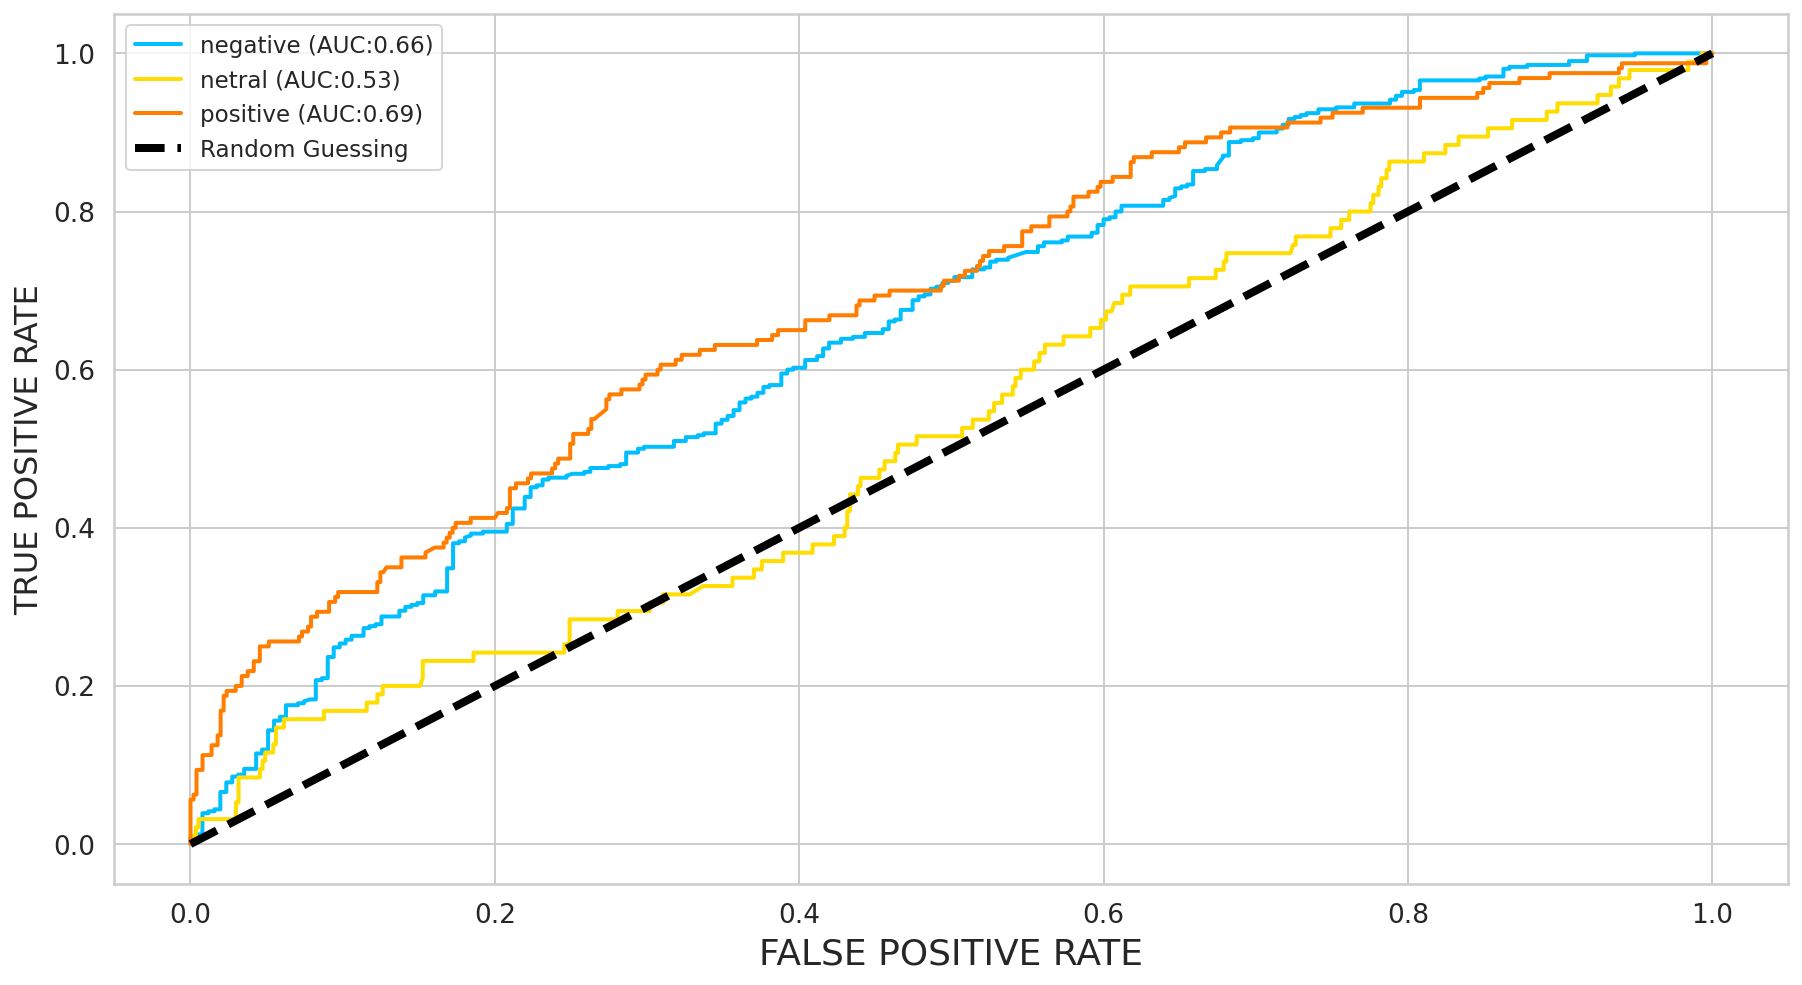

In [112]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs3 , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

##SMOTE

In [113]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [114]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

# Stemming
from nltk.stem import PorterStemmer

In [115]:
global stopwords_list  

stopwords_list = stopwords.words('english')

In [116]:
class clean_tweet(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        print('init called')
    
    def fit(self,X,y=None):
        print('fit called')
        return self
       
    def transform(self, X, y = None):
        
        print('transform called')
        
        X_1 = X.copy()
  
        def clean_tweet_func(tweet):

            if type(tweet) == float:
                return ""

            temp = tweet.lower()
            temp = re.sub("'", "", temp) # to avoid removing contractions in english
            temp = re.sub("@[A-Za-z0-9_]+","", temp)
            temp = re.sub("#[A-Za-z0-9_]+","", temp)
            temp = re.sub(r'http\S+', '', temp)
            temp = re.sub('[()!?]', ' ', temp)
            temp = re.sub('\[.*?\]',' ', temp)
            temp = re.sub("[^a-z0-9]"," ", temp)
            temp = temp.split()
            temp = [w for w in temp if not w in stopwords_list]


            #Instantiate stemming class
            stemmer = PorterStemmer()

            #Creating a list of stems of words in tweet
            tweets_stem = []
            for word in temp:
                stem_word = stemmer.stem(word)
                tweets_stem.append(stem_word)

            tweets_stem = " ".join(word for word in tweets_stem)

            return tweets_stem
        
        X_1 = X_1.apply(lambda x: clean_tweet_func(x))
        
        return X_1

In [117]:
X_train, X_test, y_train, y_test = train_test_split(dat['Data_Cleaned'],dat['rating'], test_size=1/3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.8, random_state=42)

In [118]:
y_train.value_counts()

0    990
2    406
1    266
Name: rating, dtype: int64

In [119]:
text_transformer = Pipeline(steps = [('cleaner',clean_tweet()),
                                    ('vectorize_text',TfidfVectorizer(ngram_range=(1,2), max_features=500000))])

init called


In [120]:
# fit the pipeline on train data

text_transformer.fit(X_train)

X_train_text_vectorised = text_transformer.transform(X_train)

fit called
transform called
transform called


In [121]:
# transform the test data with the pipeline

X_val_text_vectorised = text_transformer.transform(X_val)

transform called


In [122]:
# transform the test data with the pipeline

X_test_text_vectorised = text_transformer.transform(X_test)

transform called


In [123]:
# SMOTE on the training data

from imblearn.over_sampling import SMOTE

sm_model = SMOTE()
X_train_res, y_train_res = sm_model.fit_resample(X_train_text_vectorised, y_train) 

In [124]:
X_train.shape, y_train.shape

((1662,), (1662,))

In [125]:
X_train_res.shape, y_train_res.shape

((2970, 8783), (2970,))

In [126]:
y_train_res.value_counts()

2    990
0    990
1    990
Name: rating, dtype: int64

In [127]:
## Splitting the dataset into Train and Test
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_res,y_train_res, test_size=1/3, random_state=42)
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_test_,y_test_, test_size=0.8, random_state=42)

In [128]:
X_train_ = X_train_.todense()
X_test_ = X_test_.todense()
X_val_ = X_val_.todense()

In [129]:
def create_data_loader(X, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews = dat.Data_Cleaned.to_numpy(),
    targets = dat.rating.to_numpy(),
    tokenizer = tokenizer,
    max_len = max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [130]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(X_train_, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [131]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}

In [132]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [133]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32])


In [134]:
from transformers import BertTokenizer, AutoModel

PRE_TRAINED_MODEL_NAME = 'indobenchmark/indobert-base-p1'
bert_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [135]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [136]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [137]:
model = SentimentClassifier(len(class_names1))
model = model.to(device)

In [138]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 64])
torch.Size([32, 64])


In [139]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.5017, 0.2325, 0.2658],
        [0.4559, 0.2927, 0.2514],
        [0.4078, 0.2344, 0.3578],
        [0.3833, 0.2314, 0.3854],
        [0.4854, 0.2292, 0.2855],
        [0.4633, 0.2755, 0.2612],
        [0.4787, 0.2098, 0.3115],
        [0.4473, 0.2388, 0.3139],
        [0.4202, 0.1675, 0.4123],
        [0.4088, 0.2473, 0.3439],
        [0.5202, 0.2279, 0.2519],
        [0.3880, 0.2010, 0.4110],
        [0.4247, 0.2553, 0.3200],
        [0.3816, 0.2947, 0.3236],
        [0.3469, 0.3362, 0.3169],
        [0.4263, 0.2068, 0.3669],
        [0.4417, 0.2791, 0.2791],
        [0.4327, 0.2451, 0.3223],
        [0.4719, 0.2211, 0.3070],
        [0.5850, 0.1119, 0.3031],
        [0.4464, 0.2208, 0.3328],
        [0.5295, 0.1918, 0.2787],
        [0.3629, 0.2842, 0.3530],
        [0.3908, 0.3070, 0.3021],
        [0.4378, 0.2600, 0.3022],
        [0.4310, 0.2152, 0.3538],
        [0.4812, 0.2274, 0.2914],
        [0.4237, 0.2560, 0.3203],
        [0.5658, 0.1868, 0.2474],
        [0.475

In [152]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [153]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [154]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [155]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [156]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train_)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val_)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.8771103719870249 accuracy 0.7878787878787878
Val   loss 0.850512927159285 accuracy 8.33838383838384

Epoch 2/4
----------
Train loss 0.828368312655351 accuracy 0.8459595959595959
Val   loss 0.7878658584295175 accuracy 8.707070707070708

Epoch 3/4
----------
Train loss 0.777614434942221 accuracy 0.8636363636363636
Val   loss 0.7276812757437046 accuracy 9.080808080808081

Epoch 4/4
----------
Train loss 0.7485182457245313 accuracy 0.8994949494949495
Val   loss 0.7064509212206571 accuracy 9.141414141414142

CPU times: user 1min 45s, sys: 33.6 s, total: 2min 19s
Wall time: 2min 40s


In [157]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test_)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2.2853535353535355

In [158]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val_)
)

val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


9.141414141414142

In [159]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [160]:
y_review_texts, y_pred_smt, y_pred_probs_smt, y_test_ = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [161]:
print(classification_report(y_test_, y_pred_smt, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.74      0.95      0.83      1504
      netral       0.00      0.00      0.00       383
    positive       0.68      0.64      0.66       606

    accuracy                           0.73      2493
   macro avg       0.47      0.53      0.50      2493
weighted avg       0.61      0.73      0.66      2493



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


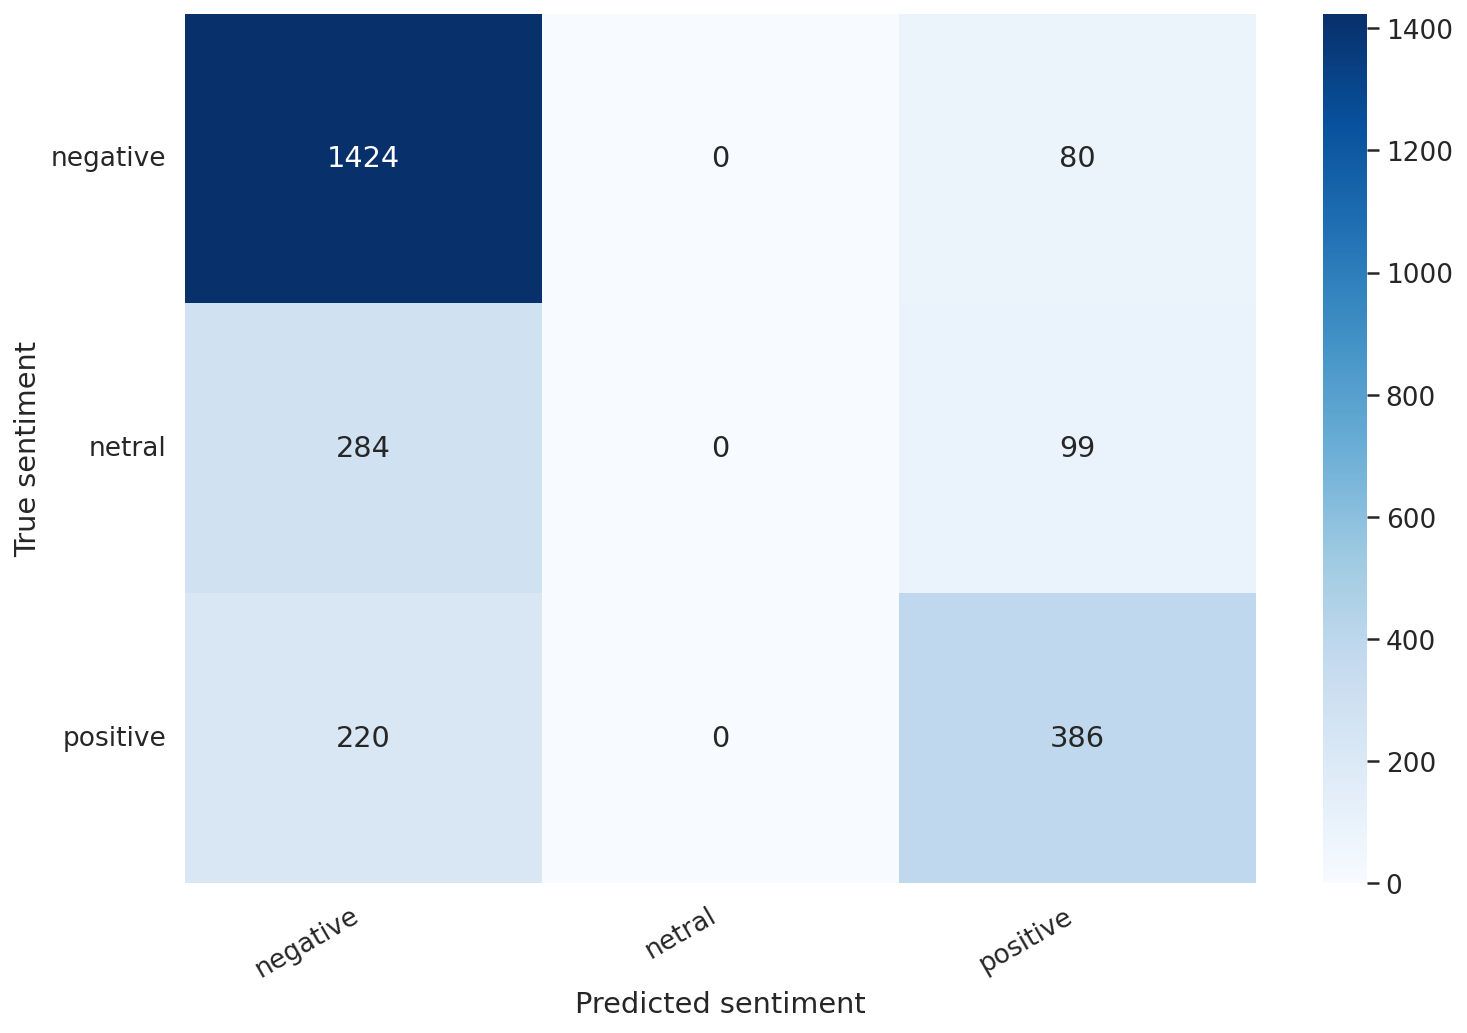

In [162]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test_, y_pred_smt)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.8662791717329983


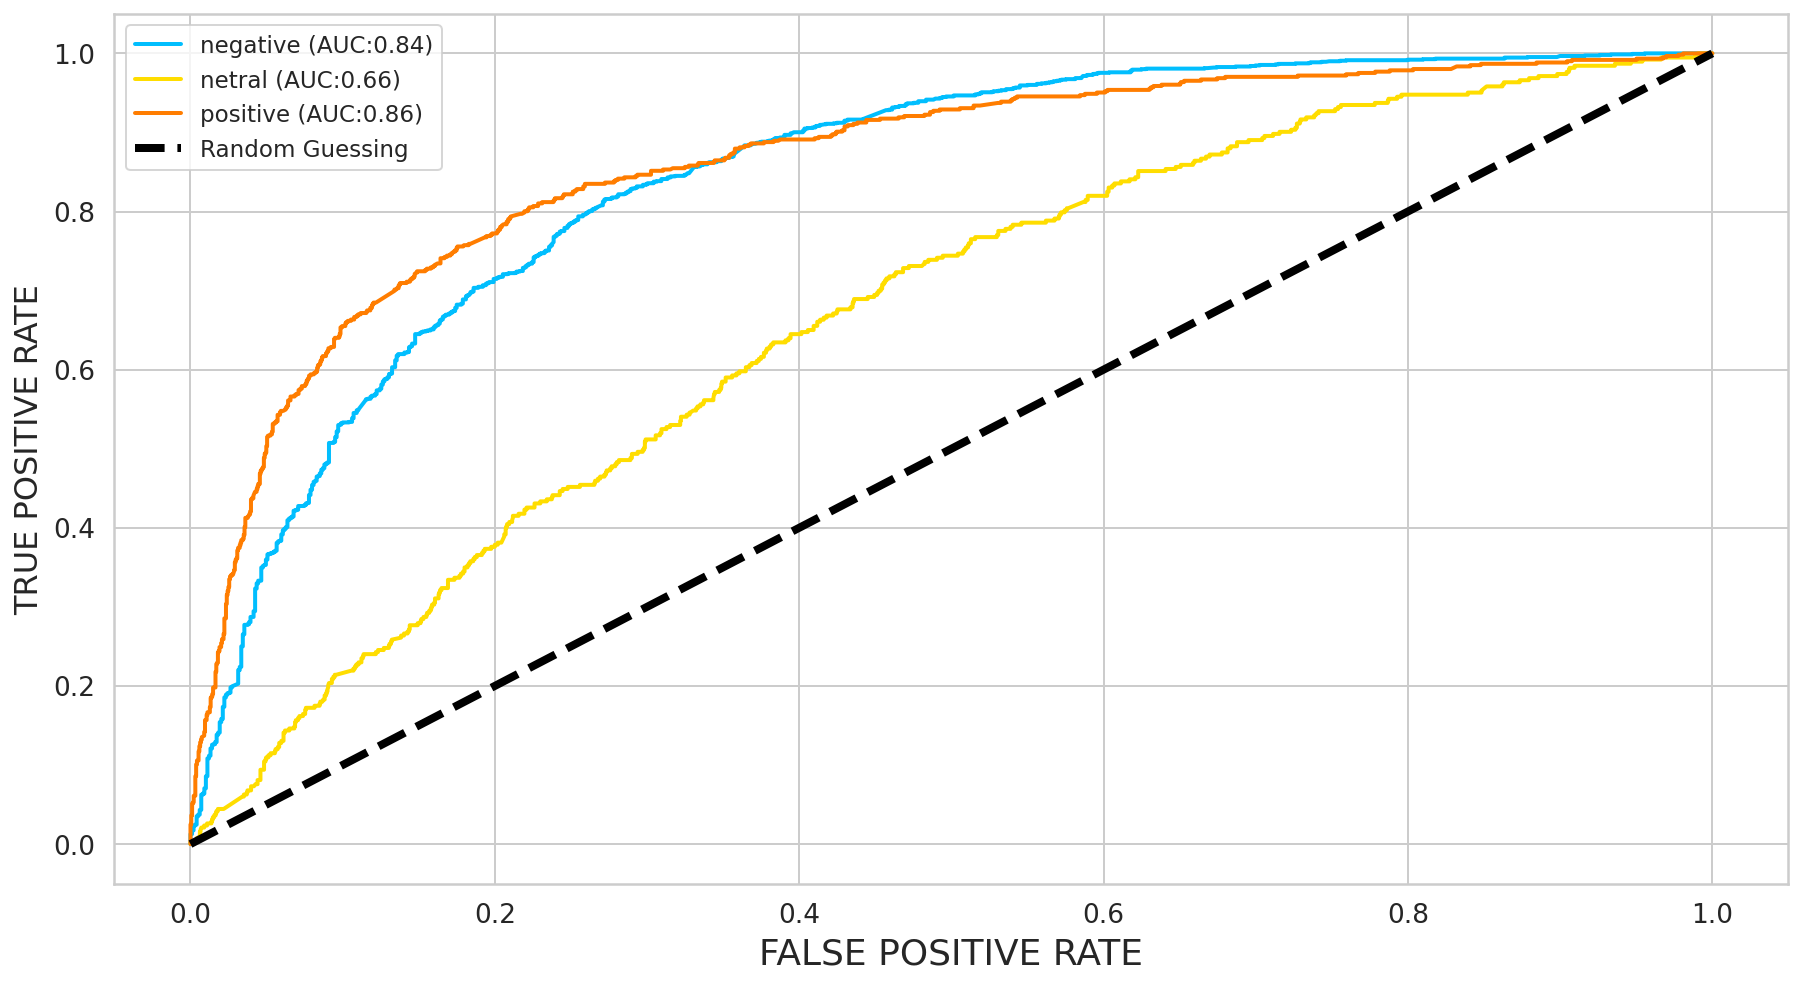

In [163]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test_ , y_pred_probs_smt , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();